# Bay Area Airbnb Review Classification
### Capstone Part 1: Exploratory Data Analysis
Lauren Mitchell 2022

#### Project Objective 
The objective of this project is to take Airbnb reviews from available web datasets and perform Natural Language Processing on the text of the reviews to evaluate them on sentiment analysis and then cluster them based on possible issues with the Airbnbs. 

#### Notebook Objective
This notebook tackles the first step which includes aquiring, cleaning, and exploring the data. The final output of this dataframe is a csv file that is ready for NLP

### Notebook Outline

#### Section 1: Data Import 
1. Import Libraries
2. Read in the Data 

#### Section 2: Data Cleaning 
3. Data Cleaning

#### Section 3: Exploratory Data Analysis 
4. Data Visualization and EDA

#### Section 4: Merging the Dataframe and Final Cleaning
5. Merging the two data frames 
6. Making sure the table has no missing values or irregularities. 

#### Section 5: Prepping the text
7. Removing non-english reviews
8. Limiting to reviews 2018 or later
9. Removing Breaks and Tabs from comments
10. Creating a unique identifier for each review before we split apart sentences

#### Section 6: Sentiment Analysis 
11. Perform sentiment analysis on the reviews

#### Section 7: Sentence Breakdown
12. Break the negative reviews into sentences

#### Section 8: Data Export
13. Export the data for NLP and modeling

Data source http://insideairbnb.com/get-the-data/

Date of last update: 
- San Francisco - Updated 03 June, 2022


### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plotly
import plotly.express as px
import plotly.graph_objects as go

#spacey
import spacy
from nltk.corpus import stopwords
from nltk import tokenize
import nltk
nltk.download('punkt')

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Section 1: Data Import

In [ ]:
# Section 1: Import the Data

from google.colab import files
uploaded = files.upload()

Saving listings_oak.csv to listings_oak.csv
Saving reviews_oak.csv to reviews_oak.csv


In [ ]:
#importing Oakland data
listings = pd.read_csv('listings_oak.csv')
reviews = pd.read_csv('reviews_oak.csv')

# Section 2: Data Cleaning

In [ ]:
#inspecting the listings df
print(listings.info())
listings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2211 non-null   int64  
 1   name                            2211 non-null   object 
 2   host_id                         2211 non-null   int64  
 3   host_name                       2211 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2211 non-null   object 
 6   latitude                        2211 non-null   float64
 7   longitude                       2211 non-null   float64
 8   room_type                       2211 non-null   object 
 9   price                           2211 non-null   int64  
 10  minimum_nights                  2211 non-null   int64  
 11  number_of_reviews               2211 non-null   int64  
 12  last_review                     18

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3083,Room #2 @ B-Love's Guest House,3518,Traci,NaN,Prescott,37.81013,-122.29266,Private room,53,3,49,2022-01-16,0.53,6,173,10,NaN
1,5739,Mod Studio,9276,Leah And Gyorgy,NaN,Oakland Ave-Harrison St,37.81352,-122.26055,Entire home/apt,125,4,282,2022-03-08,1.82,1,60,18,NaN
2,23637,Welcome to my Charming Home,93339,Mika,NaN,Montclair,37.82994,-122.20976,Private room,65,7,50,2022-02-04,0.34,1,220,6,NaN


There are 2211 unique listings. Most columns are not missing data. I will need to check for duplicate listings.

#### Concatenating the reviews tables

In [ ]:
#inspecting the reviews df
print(reviews.info())
reviews.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105188 entries, 0 to 105187
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     105188 non-null  int64 
 1   id             105188 non-null  int64 
 2   date           105188 non-null  object
 3   reviewer_id    105188 non-null  int64 
 4   reviewer_name  105188 non-null  object
 5   comments       105178 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.8+ MB
None


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3083,16797662,2014-08-02,18272366,Carlos Kenji,"B- love guest house is a pretty good place, everybody was very nice people, I had great time and is very close from the BART."
1,3083,19980893,2014-09-21,4400249,Jason,"The description was accurate, B was very nice and accommodating. The back yard was great and location was close to the bart."
2,3083,21720882,2014-10-22,4268642,Carmen,"B-Love makes me feel at home since she open the door. She is very kind and the bedroom was exactly the photograph and very comfortable and clean. We also had our own bathroom.\r<br/>The neighboor is fantastic and very well comunicate, because of the Bart, with the center. In 15 minutes you are in Union Square. I recomend this place because we have been like at home"


There are 105,188 reviews, only the comments column has 10 missing values. These will need to be dropped since this is our target column

In [ ]:
reviews = reviews.dropna(subset=['comments'])

In [ ]:
reviews.shape

(105178, 6)

the 10 reviews with missing comments have been dropped

# Data Cleaning

the bulk of my analysis will be done on the comments column. It is important that that column is properly cleaned, however some of that will happen in the next notebook. 

The other columns that contain metadata about the listings could be useful at the end when looking for trends in issues. 

First I will check to see how much data is missing, then I will drop columns that dont contain useful data, or are missing a lot of data. 

In [ ]:
listings[listings['id'].duplicated()].sum().sum()

0.0

There are no duplicate listings

In [ ]:
reviews[reviews['comments'].duplicated()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
545,31573,36497486,2015-06-28,33597116,Yinguo,The host canceled this reservation 2 days before arrival. This is an automated posting.
765,70457,17138830,2014-08-07,16077735,Panther,The reservation was canceled the day before arrival. This is an automated posting.
1282,169599,1701439,2012-07-14,2931038,Василий,The reservation was canceled the day before arrival. This is an automated posting.
1409,169599,200825011,2017-10-06,50115303,Craig,"Marlene's place is great. We had all we needed, extra info, privacy, good comfort in a very quiet area and with great access to SF. We appreciated the communication and possibility to check-in at any time, by ourselves. Definitely recommend it."
1820,242472,57279616,2015-12-23,11870597,Ray,The host canceled this reservation the day before arrival. This is an automated posting.
...,...,...,...,...,...,...
105056,54024840,576877905145977962,2022-03-06,439471426,Olivia,It was great!
105097,54261563,541353383885109236,2022-01-16,440313402,Gustavo,It was a nice stay
105158,556788706122655447,566797515022314854,2022-02-20,138921866,Joseph Tyler,Lovely place!
105159,558655316415381784,568190400812968255,2022-02-22,386629628,Gev,Great host!


There are 2120 out of approximately 100,000 reviews that are duplicated. However, this is just the text and it is possible that the text is exactly the same. For example, "Great Host!".

Let's take a closer look into that review that is a little longer.

In [ ]:
reviews[reviews['comments'] == "Marlene's place is great. We had all we needed, extra info, privacy, good comfort in a very quiet area and with great access to SF. We appreciated the communication and possibility to check-in at any time, by ourselves. Definitely recommend it."] 


,listing_id,id,date,reviewer_id,reviewer_name,comments
1404,169599,160573125,2017-06-14,58695639,Florin,"Marlene's place is great. We had all we needed, extra info, privacy, good comfort in a very quiet area and with great access to SF. We appreciated the communication and possibility to check-in at any time, by ourselves. Definitely recommend it."
1409,169599,200825011,2017-10-06,50115303,Craig,"Marlene's place is great. We had all we needed, extra info, privacy, good comfort in a very quiet area and with great access to SF. We appreciated the communication and possibility to check-in at any time, by ourselves. Definitely recommend it."


This is odd, but maybe Craig didnt know what to write and copied what Florin wrote? 

Let's see if there are any truly duplicate reviews with the same comment, listing_id and date


In [ ]:
duplicate_reviews = reviews[reviews.duplicated(['comments', 'listing_id', 'date'])]
duplicate_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments


There are none. I think these 2000 reviews are fine to keep. There is not that much data overall so we want everything we can get, and it appears these are genuine duplicates.



### Checking the non-target columns for missing data

In [ ]:
#checking for null values by building a dataframe with the count of missing values as well as the percent missing
list_missing_values = pd.DataFrame({'Count_Missing' : listings.isnull().sum(), 
                                    'Percent_Missing' : round(listings.isnull().sum()/len(listings)*100,3)})
list_missing_values

,Count_Missing,Percent_Missing
id,0,0.000
name,0,0.000
host_id,0,0.000
host_name,0,0.000
neighbourhood_group,2211,100.000
neighbourhood,0,0.000
latitude,0,0.000
longitude,0,0.000
room_type,0,0.000
price,0,0.000


### Columns to Drop: 

  1. `neighbourhood_group` has only null values. This column can be dropped.
  2. `license` has only null values. This column can be dropped.

### Columns that will not be dropped with missing values:

  1. `last_review` and `reviews_per_month` are both missing 364 values (16%)

#### Drop Neighborhood Group and License

In [ ]:
#dropping the column neighbourhood_group'
listings = listings.drop(columns = ['neighbourhood_group', 'license'], axis=1)

In [ ]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

I will not drop host name, last_review, or reviews_per_month. These columns might be used for some analysis at the end, but they are not essential to the NLP and we want to keep as many reviews as possible.

# Section 3: Exploratory Data Analysis

#### Visualizing the Airbnbs Using Plotly

In [ ]:
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", hover_name="name", hover_data=["price", "number_of_reviews"],
                        color_discrete_sequence=["fuchsia"], zoom=12, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Observations:**

   - There appear to be listings that cover the entire city
   - Some listings have zero reviews, these will need to be dropped when the datasets are merged. 

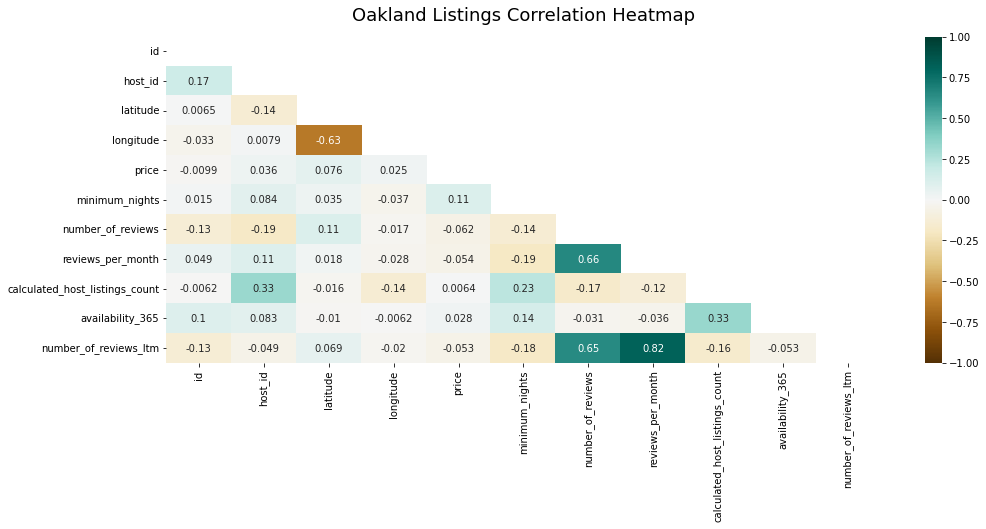

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(listings.corr(), dtype=np.bool))
heatmap = sns.heatmap(listings.corr(), mask=mask, vmin=1, vmax=-1, annot=True, cmap='BrBG')
heatmap.set_title('Oakland Listings Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**Observations:**

- `number_of_reviews_ltm` which is reviews last 12 months has a moderate positive corelation with `number_of_reviews` and `reviews_per_month`.
- `longitude` and `latitude` are strongly negatively correlated.

In [ ]:
#supressing scientific notation for readability
pd.set_option('display.float_format', lambda x: '%.3f' % x)

listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2211.000,26658250298803304.000,120064276565278144.000,3083.000,16585687.000,35575488.000,49271314.000,588081191329463296.000
host_id,2211.000,84008176.820,114482661.683,2852.000,6109378.000,29195991.000,109682638.000,450199882.000
latitude,2211.000,37.813,0.028,37.713,37.798,37.814,37.836,37.886
longitude,2211.000,-122.240,0.039,-122.308,-122.270,-122.251,-122.212,-122.125
price,2211.000,148.563,193.469,19.000,78.000,116.000,168.000,5000.000
minimum_nights,2211.000,10.492,22.661,1.000,2.000,3.000,10.000,365.000
number_of_reviews,2211.000,47.575,79.450,0.000,2.000,13.000,55.500,577.000
reviews_per_month,1847.000,1.468,1.609,0.010,0.320,0.870,2.090,13.790
calculated_host_listings_count,2211.000,5.375,10.171,1.000,1.000,2.000,4.000,54.000
availability_365,2211.000,170.439,130.067,0.000,53.500,150.000,310.000,365.000


**Observations:**

   - We will ignore the `id` and `host_id` columns but it is good to know that both have a count of 6413. 
   - `Latitude` and `longitude` have a reasonable range for this area. 
   - The `price` ranges from 0 to 25,000 a night, with a mean of 228 a night. I will need to look into listings with a price of 0. 
   - the average `mimimum_nights` is 1 and max is 1125. 
   - The average `number_of_reviews` is 44
   - The average `reviews_per_months` is 2
   - Interestingly `calculated_host_listing_count` has a median of 2 but a max of 154. So most hosts have one or two listings but some have a large number. It will be interesting to see if this has an impact on sentiment/ airbnb issues.
   - The mean and median `availability` are close at 166 and 153. 
   - `number_of_reviews_ltm` (number of reviews in the last 12 months) has an mean of 7.  

In [ ]:
#examining listings with price = 0
listings[listings['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


# Section 4: Merging the Dataframe and Final Cleaning

### Steps:
1. Merge `reviews` and `listings`
2. Confirm there are still 105,178 rows
3. Drop redudant columns from the merge
4. Drop rows that are missing review text in the `comments` column
5. Look into listings with a price of 0
7. Convert Datetime columns to datetime: 
        - last_review                        
        - date                          



### Merge listings and reviews

Ensure that no information was lost or duplicated

In [ ]:
print(f'There are {listings.shape[0]} listings and {reviews.shape[0]} reviews')

There are 2211 listings and 105178 reviews


 `listings` connects to `reviews` through the `id` == `listing_id`

In [ ]:
reviews['listing_id'].value_counts()

21632573    577
1456375     570
1615052     570
883762      520
1914270     503
           ... 
50269234      1
50314498      1
50334798      1
50404700      1
45363837      1
Name: listing_id, Length: 1847, dtype: int64

In [ ]:
listings_and_reviews = pd.merge(reviews, listings, left_on='listing_id', right_on='id', how='inner')

In [ ]:
listings_and_reviews.shape

(105178, 22)

the new table has 105,178 rows × 22 columns. This is the same amount of **rows** as the reviews_sf.

In [ ]:
listings_and_reviews.head(3)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,host_id,host_name,...,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3083,16797662,2014-08-02,18272366,Carlos Kenji,"B- love guest house is a pretty good place, everybody was very nice people, I had great time and is very close from the BART.",3083,Room #2 @ B-Love's Guest House,3518,Traci,...,-122.293,Private room,53,3,49,2022-01-16,0.530,6,173,10
1,3083,19980893,2014-09-21,4400249,Jason,"The description was accurate, B was very nice and accommodating. The back yard was great and location was close to the bart.",3083,Room #2 @ B-Love's Guest House,3518,Traci,...,-122.293,Private room,53,3,49,2022-01-16,0.530,6,173,10
2,3083,21720882,2014-10-22,4268642,Carmen,"B-Love makes me feel at home since she open the door. She is very kind and the bedroom was exactly the photograph and very comfortable and clean. We also had our own bathroom.\r<br/>The neighboor is fantastic and very well comunicate, because of the Bart, with the center. In 15 minutes you are in Union Square. I recomend this place because we have been like at home",3083,Room #2 @ B-Love's Guest House,3518,Traci,...,-122.293,Private room,53,3,49,2022-01-16,0.530,6,173,10


In [ ]:
# Checking how many listings were actually joined to reviews
listings_and_reviews['listing_id'].nunique()

1847

In [ ]:
# checking how many listings there were origionally 
listings['id'].nunique()

2211

Here we see there were 364 listings that didnt have any reviews. These listings are lost in the merge which is ok.

Next I will drop redundant columns

In [ ]:
listings_and_reviews = listings_and_reviews.drop(columns = ['id_x', 'id_y'], axis =1)

#### Checking for missing comments

In [ ]:
listings_and_reviews.comments.isnull().sum()

0

#### Checking for listings with a price of 0. 

In [ ]:
listings_and_reviews[listings_and_reviews['price'] == 0]

,listing_id,date,reviewer_id,reviewer_name,comments,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


### DateTime:
I am going to convert last reivew and date to the datetime data type.
#### Last Reivew

In [ ]:
listings_and_reviews['last_review'] = pd.to_datetime(listings_and_reviews['last_review'])
listings_and_reviews['last_review'].head()

0   2022-01-16
1   2022-01-16
2   2022-01-16
3   2022-01-16
4   2022-01-16
Name: last_review, dtype: datetime64[ns]

In [ ]:
listings_and_reviews['date'] = pd.to_datetime(listings_and_reviews['date'])
listings_and_reviews['date'].head()

0   2014-08-02
1   2014-09-21
2   2014-10-22
3   2015-02-25
4   2015-05-26
Name: date, dtype: datetime64[ns]

# Section 5: Prepping the text for NLP

#### Removing non-english Reviews

In [ ]:
#creating a blank list to store the indexes for non-english reviews
non_english_index_list = []

In [ ]:
# a for loop that searches for common characters in other languages that I have observed in reviews while working with the data
for i, comment in enumerate(listings_and_reviews['comments']):
    if 'ä' in comment:
        non_english_index_list.append(i)
    if 'ö' in comment:
        non_english_index_list.append(i)   
    if 'ü' in comment:
        non_english_index_list.append(i) 
    if 'í' in comment:
        non_english_index_list.append(i)
    if 'ñ'in comment: 
        non_english_index_list.append(i)
    if 'е'in comment: 
        non_english_index_list.append(i)
    if 'д'in comment: 
        non_english_index_list.append(i)
    if 'у'in comment: 
        non_english_index_list.append(i)
    if '我'in comment: 
        non_english_index_list.append(i)

In [ ]:
# how many non-english reviews will be removed 
len(non_english_index_list)

1218

In [ ]:
listings_and_reviews.iloc[non_english_index_list,:].sample(1, random_state = 1)

IndexError: ignored

In [ ]:
# checking the origional shape of the dataframe before non-english reviews are dropped
listings_and_reviews.shape

(105178, 20)

In [ ]:
listings_and_reviews = listings_and_reviews.drop(listings_and_reviews.index[non_english_index_list])

In [ ]:
#checking the number of reviews after these have been dropped
listings_and_reviews.shape

(104412, 20)

### Limiting to reviews 2018 or later

Recent reviews will be most useful, however for the sake of the modeling we want to keep as many reviews as possible for NLP. 

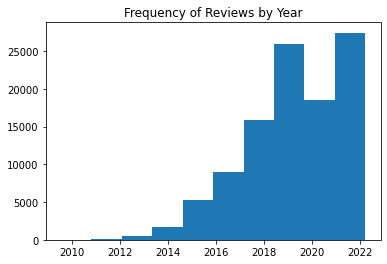

In [ ]:
plt.figure()
plt.hist(listings_and_reviews.date, bins =10)
plt.title("Frequency of Reviews by Year")
plt.show();

In [ ]:
### Limiting to reviews 2018 or later.
listings_and_reviews = listings_and_reviews[listings_and_reviews['date'] > '01-01-2018']

### Removing Breaks and tabs

In [ ]:
listings_and_reviews['comments'] = listings_and_reviews['comments'].replace(r'/t',' ', regex=True) 
listings_and_reviews['comments'] = listings_and_reviews['comments'].replace(r'  ',' ', regex=True) 
listings_and_reviews['comments'] = listings_and_reviews['comments'].replace(r'<br/>',' ', regex=True) 

In [ ]:
listings_and_reviews['comments'].sample(3)

90372    Shailey place is cute and comfortable. She was very accommodating and helpful. If you need to stay in the area for a long visit It’s a terrific one bedroom with kitchen not far from Montclair Village.
69418                                                                                                                                                                 Place was great and nice and close to food!
86942                                                                                  Always available street parking not to much of a drive to the tourist locations of San Fran! All in all such a great place
Name: comments, dtype: object

#### Creating a unique identifier for each review before we split apart sentences

In [ ]:
listings_and_reviews.shape

(77583, 20)

In [ ]:
listings_and_reviews = listings_and_reviews.reset_index()

In [ ]:
listings_and_reviews["unique_review_code"] = listings_and_reviews.index

In [ ]:
listings_and_reviews.drop(columns = 'index', inplace = True)

In [ ]:
listings_and_reviews.shape

(77583, 21)

# Section 6: Sentiment Analysis 
## Adding Sentiement Analysis using VaderSentiment Analyzer

The next step is to pull out the negative reviews. Because there is no column related to sentiment we will need to use an outside traning set. Here I am using the VaderSentiment Analyzer.

After iterating through this workflow a few times I found that sentiment can be better predicted on the sentence level, **however due to the size of the dataset, breaking the reviews into sentences is easier after we have weeded out some of the positive reviews.** In this step we will work to separate the clearly postiive reviews from the reviews with at least some negative comments. 

NEXT STEPS: 
- pull out negative reviews
- split negative reviews into sentences
- pull out negative sentences
- Do topic modeling with negative sentences to find themes and create tags

https://github.com/cjhutto/vaderSentiment

In [ ]:
# install vader if not already available
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
# importing the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# instantiating the analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#adding columns to the sentiment dataframe for negative, postive, and neutral sentiment

listings_and_reviews['neg'] = [analyzer.polarity_scores(x)['neg'] for x in listings_and_reviews['comments']]
listings_and_reviews['pos'] = [analyzer.polarity_scores(x)['pos'] for x in listings_and_reviews['comments']]

### Creating a "Negativity Rating" a ratio of Negativity Score to Postivity Score, and dropping unnecessary columns.

In [ ]:
listings_and_reviews['pos_minus_neg'] = listings_and_reviews['pos'] - listings_and_reviews['neg'] 

# Heads-up analysis of Review Sentiment

The analysis must have only negative reviews for clustering. In the next few steps I will take a random sample of reviews and do a heads up analysis of sentiment. I will then compare that to the "neg", "pos", and "negativity_ratio" to find an optimal cutoff score. 

This can also serve as a hyperparameter that can be tuned later in the topic modeling phase. 

In [ ]:
neg_greater_than_0 = listings_and_reviews[listings_and_reviews['neg'] > 0]

In [ ]:
neg_greater_than_0.shape

(14381, 24)

14,383 out of the 77,636 reviews have negative sentiment, about 19%. This seems logical, most people hopefully have a positive experience.

### Sampling 10 Reviews

In [ ]:
pd.set_option('display.max_colwidth', None)
neg_greater_than_0.loc[:,['comments','neg','pos','pos_minus_neg']].sample(n=10, random_state=88)

,comments,neg,pos,pos_minus_neg
55140,"First of all let me tell you that I have anxiety anywhere and everywhere I go. When I parked in front of Michaels I got a bit nervous not being in my own place or home. I hesitated to go inside. I read our chats & the instructions he gave me m, to get into his place, were super easy AND it did not cause me to hyperventilate lol Oh & also love that you have to take your shoes off, for i am the same way in my place 😍 The minute I walked in, i took a deep breath, I felt calm and felt as if I was at my own place. The energy in his home was very soothing and meditating. This is a place I’d come & stay all the time.! 😬 When I went towards his dining room table there was a note from him mentioning my name & telling me to “enjoy”. (Super sweet) There was a folder left on the table which had instructions for everything. Literally everything. In their, he mentioned places to eat, one called Sequioa Diner, which I fell in love with. Reminded me of Nickel Diner here in DTLA that I truly love. My boyfriend said “Who is this guy?” Lol. He said, “I don’t know this guy Michael but I feel like he is a very awesome guy.” I too felt a very majestic wondrous energy feeling being at your place . Thank you Michael! 😘",0.022,0.177,0.155
29240,It was great for the price and the location was great. It’s in a quiet neighborhood and if you’re used to living next to a bit of a busy street you’ll enjoy this stay. There are any though and it’s a bit difficult to find parking. For the price it’s great.,0.039,0.242,0.203
41880,Quiet and cozy apartment. There is a washing machine in the unit. Near the house there is a parking spot. But unfortunately there was used and dirty linens . it was very unpleasant to sleep.,0.265,0.000,-0.265
63761,"This bungalow was as pictured, clean and well-located. The interior is tastefully redone and kitchen includes pots, pans and spices, making cooking easy! The nearest BART stop was a 10 min walk or $7 Uber ride. Hosts are accessible and welcoming. I would definitely choose to stay again when we return for future family gatherings. Happy experience!",0.032,0.225,0.193
42460,"Great price and place to stay! Even though the area is not the nicest, Oluoch’s place is nice and private. It has everything you need for a short stay (extra towels) 😉 He’s fast at answering any inquiries and helpful when we needed it.",0.049,0.186,0.137
38163,Great location in Rockridge. Super walkable to BART and other amenities. Less than a block away from Safeway and restaurants. We were able to find street parking easily. The street noise from the local bars at night is noticeable but that's to be expected in an urban setting. Fatima's place was clean and cute. She was also really responsive to questions. I would stay here again if I'm in Oakland.,0.022,0.217,0.195
4193,"I wanted to leave a review but I don’t have much time so I’m just going to highlight a few things: My favorite things about this place: 1. the balcony and the view 2. We could bring the dog 3. The tub was very big, more than enough for 2 people! 4. It’s roomy, 2 beds 5. It’s not too far from the urban center of Oakland 6. It’s quite close to Montclair, which is cute little town center 7. Smoking is allowed on the balcony, which is convenient because some hosts don’t Things to know: 1. There are a lot of stairs, which isn’t a problem for me because I walk a lot but it could be tough for those with arthritis or other conditions that make it difficult to walk 2. The roads in the neighborhood are narrow and windy, so I don’t recommend bringing a huge truck or SUV because parking is on the road Bottom line, I would definitely stay here again!",0.051,0.116,0.065
8241,-getting in and out of the house at late hours wasn't a problem for us. - washroom and room were clean. - laundry room were accessible everytime. - nice friendly dog. - general communication with the host was very good and they were very welcoming. Only downside was that the common area 

For the heads up analysis below, a review is considered negative if there is **at least one sentence** with a negative comment. 

In [ ]:
semtiment_sample = neg_greater_than_0.loc[:,['neg','pos', 'pos_minus_neg']].sample(n=10, random_state=88)
semtiment_sample['actual'] = ['negative','negative','negative','positive','positive',
                             'negative','positive','negative','positive','negative']
semtiment_sample

,neg,pos,pos_minus_neg,actual
55140,0.022,0.177,0.155,negative
29240,0.039,0.242,0.203,negative
41880,0.265,0.000,-0.265,negative
63761,0.032,0.225,0.193,positive
42460,0.049,0.186,0.137,positive
38163,0.022,0.217,0.195,negative
4193,0.051,0.116,0.065,positive
8241,0.045,0.199,0.154,negative
10127,0.060,0.337,0.277,positive
73977,0.031,0.110,0.079,negative



**Method Evaluation: 7 out of 10 reviews have some negative comments**

### Cutoff Threshold Evaluation

In [ ]:
# What is the average negativity score for a real positive review? 

round(semtiment_sample[semtiment_sample['actual'] == 'positive']['neg'].mean(),3)

0.048

In [ ]:
# What is the average negativity score for a real negative review? 

round(semtiment_sample[semtiment_sample['actual'] == 'negative']['neg'].mean(),3)

0.071

In [ ]:
# What is the average pos_minus_neg score for a real positive review? 

round(semtiment_sample[semtiment_sample['actual'] == 'positive']['pos_minus_neg'].mean(),3)

0.168

In [ ]:
# What is the average pos_minus_neg score for a real negative review? 

round(semtiment_sample[semtiment_sample['actual'] == 'negative']['pos_minus_neg'].mean(),3)

0.087

The pos_minus_neg score is close to zero with true negative reviews. If we place the cutoff at 0.1 and **below** we can maxamize the amount of real negative reviews that will get analyzed in our model. Since we are not only trying to find sentiment, but also trying to find problems in the details of the text it is important that we really do have mostly negative reviews.

If the cutoff is higher it means more real positive reviews will make it into the negative review dataset. This will increase **FALSE POSITIVES.** 

If the cutoff is lower it means more real negative reviews will be excluded from the negative review dataset. This will increase **FALSE NEGATIVES.**

I want to make sure there arent too many false negatives, I really do want to see all negative sentences, and allow some false positives through so I will set the max cuttof at **a pos_minus_neg score of 0.1.**

In [ ]:
df_negative_sentiment = listings_and_reviews[listings_and_reviews['pos_minus_neg'] <= 0.1]

In [ ]:
df_negative_sentiment.shape

(6125, 24)

I have now taken the origional 77,583 reviews and decreased the dataset down to 6,125 reviews with some negative sentiment. In order to more accurately pull out the details and sentiment of the review, I will now break the reviews into sentences, thus increasing the number of rows in the dataset. 

I do this for a few reasons: 
- People tend to be polite when writing reviews that will be read by future guests and homeowners and sandwitch a negative statemnet between two postive ones. 
- A review might have multiple sentences describing mutliple different issues, due to the nature of topic analysis, each row will be assigned one topic. If the review stays whole then it could only recieve one flag, whereas if it is broken into sentences there is the possibility that it will recieve more than one flag. 

# Section 7: Sentence Breakdown
## Breaking Reviews into Sentences for Modeling

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_negative_sentiment.shape

(6125, 24)

In [ ]:
interum_datframe = []

for i, comment in enumerate(df_negative_sentiment['comments']):
    
    df1 = pd.DataFrame({'Index': i,
                       'sentence': tokenize.sent_tokenize(comment)}).set_index('Index')
    
    interum_datframe.append(df1)
    
    sentences_df = pd.concat(interum_datframe)

In [ ]:
sentences_df

,sentence
Index,
0,"Clean, but outdated place with cheap furniture falling apart."
0,It is located in a sketchy area 4 blocks away from the Barc metro station.
0,"If You are a light sleeper, that’s no a place to be."
0,"You will be hearing the neighbors (starting at 6 am), the steps on top your bedroom and at 4 am maybe a dog playing with a toy on top your bedroom (vs. haunted activities)"
1,Homely feel
...,...
6124,Terrible communication too.
6124,I wasn’t given check in instructions when I booked.
6124,"I called to ask what they were the morning I was set to check in, since he wouldn’t respond to my Airbnb messages and he didn’t even know I booked it and said I couldn’t come because it was too early, yet the app told me check in was from 8am-10am and he was really rude."


The paired-down dataset of 6,125 reviews with some negative sentiment has been expanded to 27,918 unique stentences. Which means the negative reviews have on average 4.5 sentences.

### Making sure that the Unique Review Code is included in the sentences dataframe

In [ ]:
df_negative_sentiment = df_negative_sentiment.reset_index()

In [ ]:
df_negative_sentiment['index_key'] = df_negative_sentiment.index

In [ ]:
sentences_df.head(3)

,sentence
Index,
0,"Clean, but outdated place with cheap furniture falling apart."
0,It is located in a sketchy area 4 blocks away from the Barc metro station.
0,"If You are a light sleeper, that’s no a place to be."


In [ ]:
sentences_df_merged = pd.merge(sentences_df, df_negative_sentiment, left_on='Index', right_on= 'index_key', how='outer')


In [ ]:
sentences_df_keep = sentences_df_merged[['sentence','index','unique_review_code']]
sentences_df_keep

,sentence,index,unique_review_code
0,"Clean, but outdated place with cheap furniture falling apart.",0,11
1,It is located in a sketchy area 4 blocks away from the Barc metro station.,0,11
2,"If You are a light sleeper, that’s no a place to be.",0,11
3,"You will be hearing the neighbors (starting at 6 am), the steps on top your bedroom and at 4 am maybe a dog playing with a toy on top your bedroom (vs. haunted activities)",0,11
4,Homely feel,1,22
...,...,...,...
27913,Terrible communication too.,6124,77574
27914,I wasn’t given check in instructions when I booked.,6124,77574
27915,"I called to ask what they were the morning I was set to check in, since he wouldn’t respond to my Airbnb messages and he didn’t even know I booked it and said I couldn’t come because it was too early, yet the app told me check in was from 8am-10am and he was really rude.",6124,77574
27916,I had to wait to check in because he said there was someone in the house.,6124,77574


#### Finding Negative Sentences

Lets run sentiment analysis on these sentences before clustering to pull out the truly negative sentences.

In [ ]:
#adding columns to the sentiment dataframe for negative, postive, and neutral sentiment

sentences_df_keep['neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentences_df['sentence']]
sentences_df_keep['pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentences_df['sentence']]

In [ ]:
sentences_df_keep['pos_minus_neg'] = sentences_df_keep['pos'] - sentences_df_keep['neg']

In [ ]:
pd.set_option('display.max_colwidth', None)
sentences_df_keep.loc[:,['sentence','neg','pos','pos_minus_neg']].sample(n=10, random_state=101)

,sentence,neg,pos,pos_minus_neg
27014,"Had no problem finding street parking, but most spots are 2 hour limit during weekdays, 8-6pm.",0.000,0.098,0.098
520,John was an accommodating host.,0.000,0.000,0.000
13533,"The bed was comfy and it’s a large place, just expect an older cabin and not a modern flashy house.",0.000,0.000,0.000
19799,"The closeness to BART, made it all worthwhile.",0.000,0.255,0.255
12916,This bus across the street provides a less congested environment than BART.,0.000,0.000,0.000
714,"As it stands, we would not return for a long stay.",0.000,0.000,0.000
3441,"The description is accurate, including the notes about occasional sounds filtering down, but we didn’t find it troublesome at all.",0.190,0.000,-0.190
2490,She did get back to me in a timely manner at least.,0.000,0.000,0.000
17083,Another guest in the Airbnb got mugged and their passports stolen just a little earlier the same night.,0.158,0.000,-0.158
14043,The owner was extremely responsive to our requests.,0.000,0.285,0.285


In [ ]:
sentences_df_keep = sentences_df_keep[['index', 'unique_review_code', 'sentence']]

Many of the negative sentences are just statements so the negativity is not being captured in the sentiment analysis. Since many of the neg and pos scores are 0 its causing problems with deviding by zero. We will keep all review sentences.

# Section 8: Splitting and Exporting the Data
Final Preprocessing Steps 
- removing any tabs
- saving as a tab deliminated csv

In [ ]:
listings_and_reviews = listings_and_reviews.replace(r'/t',' ', regex=True) 
listings_and_reviews = listings_and_reviews.replace(r'  ',' ', regex=True) 

df_negative_sentiment = df_negative_sentiment.replace(r'/t',' ', regex=True) 
df_negative_sentiment = df_negative_sentiment.replace(r'  ',' ', regex=True) 

sentences_df_keep = sentences_df_keep.replace(r'/t',' ', regex=True) 
sentences_df_keep = sentences_df_keep.replace(r'  ',' ', regex=True) 

### Splitting Data

After much experimentation I found that topic modeling analysis with LDA is not resulting in the optimal groupings of labels, I belive a semi-supervised approach could work better. 

To do this I will split the data into 3 parts. There are 27,918 sentences at the moment. I will heads-up label 2000. 1000 for training and 500 for validation and 500 for testing. If the accuracy score is acceptable (over 70%). Then the model can be applied to all unlabled data. 

I think logistic regression or k-means clustering where k = 1000, could be good methods to get acurate results. At this point I need to split the data and label. 

In [ ]:
train_1000_to_label = sentences_df_keep.sample(n = 1000, random_state = 99)
test_500_to_label = sentences_df_keep.drop(train_1000_to_label.index).sample(n = 500, random_state = 99)
validate_500_to_label = sentences_df_keep.drop(train_1000_to_label.index).drop(test_500_to_label.index).sample(n = 500, random_state = 99)
unsupervised_data_25918 = sentences_df_keep.drop(train_1000_to_label.index).drop(test_500_to_label.index).drop(validate_500_to_label.index)

In [ ]:
print(f'training shape is {train_1000_to_label.shape}')
print(f'test shape is {test_500_to_label.shape}')
print(f'validation shape is {validate_500_to_label.shape}')
print(f'remaining data shape is {unsupervised_data_25918.shape}')

training shape is (1000, 3)
test shape is (500, 3)
validation shape is (500, 3)
remaining data shape is (25918, 3)


Exporting cleaned file as a tab deliminated csv

In [ ]:
from google.colab import files

In [ ]:
listings_and_reviews.to_csv('listings_and_reviews.csv', sep ='\t')
files.download('listings_and_reviews.csv')

df_negative_sentiment.to_csv('df_negative_sentiment.csv', sep ='\t')
files.download("df_negative_sentiment.csv")

sentences_df.to_csv('df_sentences.csv', sep ='\t')
files.download('df_sentences.csv')

train_1000_to_label.to_csv('train_1000_to_label.csv', sep ='\t')
files.download("train_1000_to_label.csv")

test_500_to_label.to_csv('test_500_to_label.csv', sep ='\t')
files.download('test_500_to_label.csv')

validate_500_to_label.to_csv('validate_500_to_label.csv', sep ='\t')
files.download('validate_500_to_label.csv')

unsupervised_data_25918.to_csv('unsupervised_data_25918.csv', sep ='\t')
files.download('unsupervised_data_25918.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Main Exported tables:

listings_and_reviews
 - the main dataframe with ALL reviews merged with listing information
 - SHAPE: (77583, 21)

df_negative_sentiment 
- a subset of the main dataframe with all negative reviews that will be analyzed
- SHAPE: (6125, 24)

sentences_df
- df_negative_sentiment but expanded so that each row is a sentence. 
- SHAPE: (27918, 3)

********************************************************
## Tables for Semi-Supervised Learning

train_1000_to_label
 - a randomly sampled subset of 1000 rows of negative sentences
 - SHAPE: (1000, 3)

test_500_to_label 
- a randomly sampled subset of 500 rows of negative sentences
- SHAPE: (500, 3)

test_500_to_label
- a randomly sampled subset of 500 rows of negative sentences.
- SHAPE: (500, 3)

unsupervised_data_28334
- the remaining negative sentences. These will not be labeled.
- SHAPE: (28,334, 3)